## Collaborative Review Task 4
Using the dataset from Eugene Fama and Kenneth French's 2013 paper “A 
Five-Factor Asset Pricing Model”,

1. Visually analyze the covariance between various factors and identify the
variance explained in principle components of these factors. Next, consider 
the ACF and PACF of the process and its square

2. Using PCA provide a 2-D representation of the weight-space of a set of 
linear models representing the covariance between our factors and the different
benchmark portfolios. Comment on the distribution of the benchmark portfolios
across the weight-space.

3. Using linear regression test for the significance of these factors, as per
the original work of Fama and French, under equation:

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

/home/haininhhoang94/anaconda3/envs/pyds/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
portfolios = web.DataReader('100_Portfolios_10x10_Daily', 'famafrench')
factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')

In [3]:
# Convert data from DataReader to DataFrame for better manipulation
factors_df = pd.DataFrame(factors[0])
factors_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2015-07-29,0.74,-0.22,0.52,0.88,0.30,0.0
2015-07-30,0.12,0.19,-0.26,0.10,-0.13,0.0
2015-07-31,-0.15,0.73,-0.99,0.24,-0.06,0.0
2015-08-03,-0.35,-0.33,-0.16,0.07,0.04,0.0
2015-08-04,-0.14,0.04,-0.19,-0.03,0.19,0.0


1. Visually analyze the covariance between various factors and identify the
variance explained in principle components of these factors. Next, consider 
the ACF and PACF of the process and its square

In [4]:
# Calculate the covariance matrix between all factors get from above
cov_df = factors_df.cov()

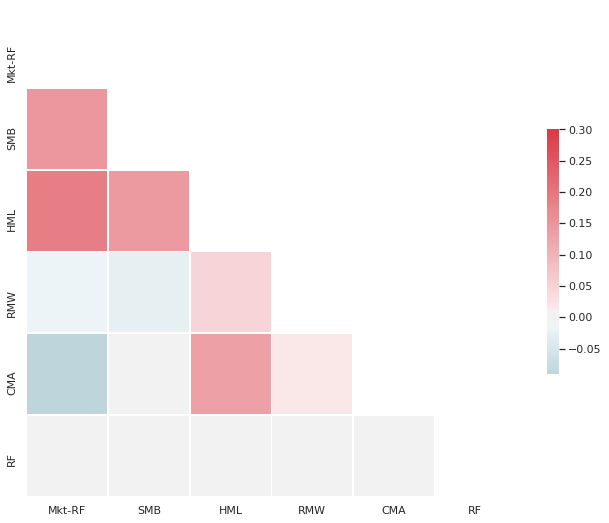

In [5]:
# Visualize convariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_df, dtype=np.bool))
# Setup the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_df, mask=mask, cmap=cmap, vmax=.3, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5})

Consider the ACF and PACF of the process and its square

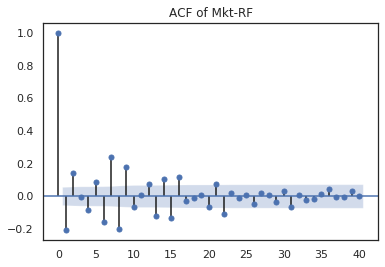

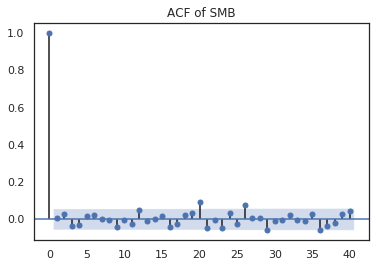

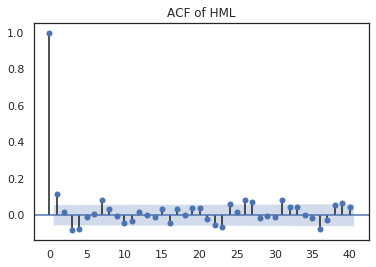

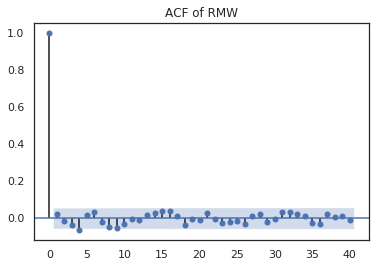

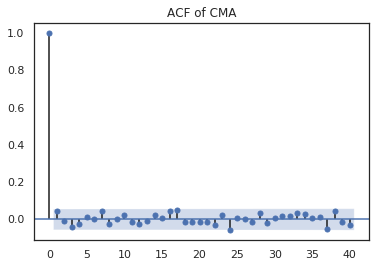

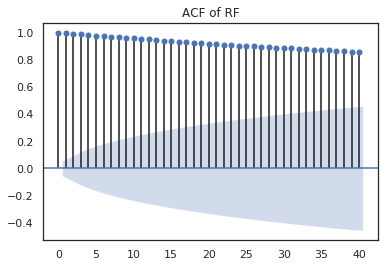

In [6]:
import statsmodels.api as sm
# Write loop for ACF for every factor. factor_list will be the list of all
# factor
factors_list = list(factors_df.columns)
for factor in factors_list:
    sm.graphics.tsa.plot_acf(factors_df[factor].values.squeeze(), lags=40)
    plt.title('ACF of {}'.format(factor))
    plt.show()

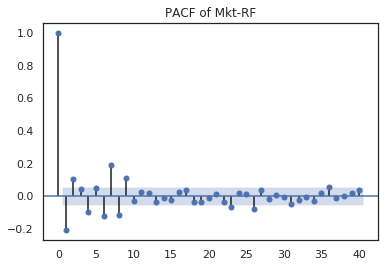

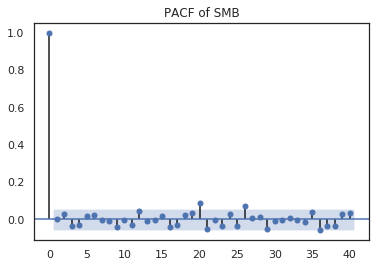

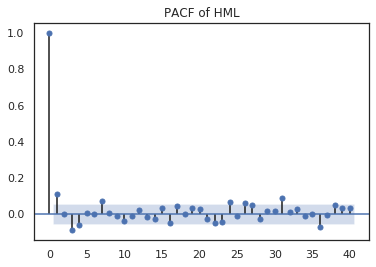

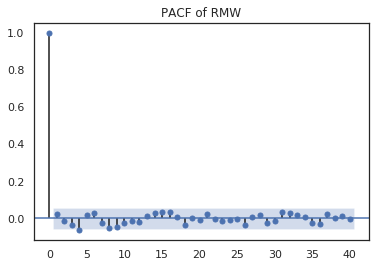

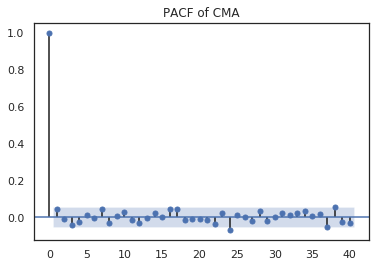

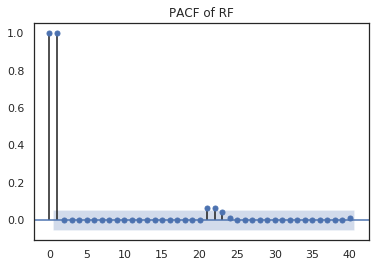

In [7]:
# Write loop for ACF for every factor. factor_list will be the list of all
# factor
for factor in factors_list:
    sm.graphics.tsa.plot_pacf(factors_df[factor].values.squeeze(), lags=40)
    plt.title('PACF of {}'.format(factor))
    plt.show()

2. Using PCA provide a 2-D representation of the weight-space of a set of 
linear models representing the covariance between our factors and the different
benchmark portfolios. Comment on the distribution of the benchmark portfolios
across the weight-space.

In [8]:
# Data Manipulation
portfolios_df = pd.DataFrame(portfolios[1])
full_df = pd.concat([factors_df, portfolios_df], axis = 1)
portfolio_list = list(portfolios_df.keys())

In [9]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(factors_df)
pca_df = pd.DataFrame(data=pcs, columns=['Component_1', 'Component_2'])
pca_df.head()

,Component_1,Component_2
0,-0.736859,0.416850
1,-0.063187,-0.167996
2,0.270165,-0.536567
3,0.453062,-0.113701
4,0.208966,-0.029683


In [10]:
C1 = []
C2 = []

In [11]:
for pca_comp in ['Component_1','Component_2']:
    for portfolio in portfolio_list:
        cov_num = np.cov(pca_df[pca_comp],portfolios_df[portfolio])[0]
        if pca_comp == 'Component_1':
            C1.append(cov_num)
        else:
            C2.append(cov_num)

Text(0.5, 1.0, 'Covariance between Component 1 and Portfolios')

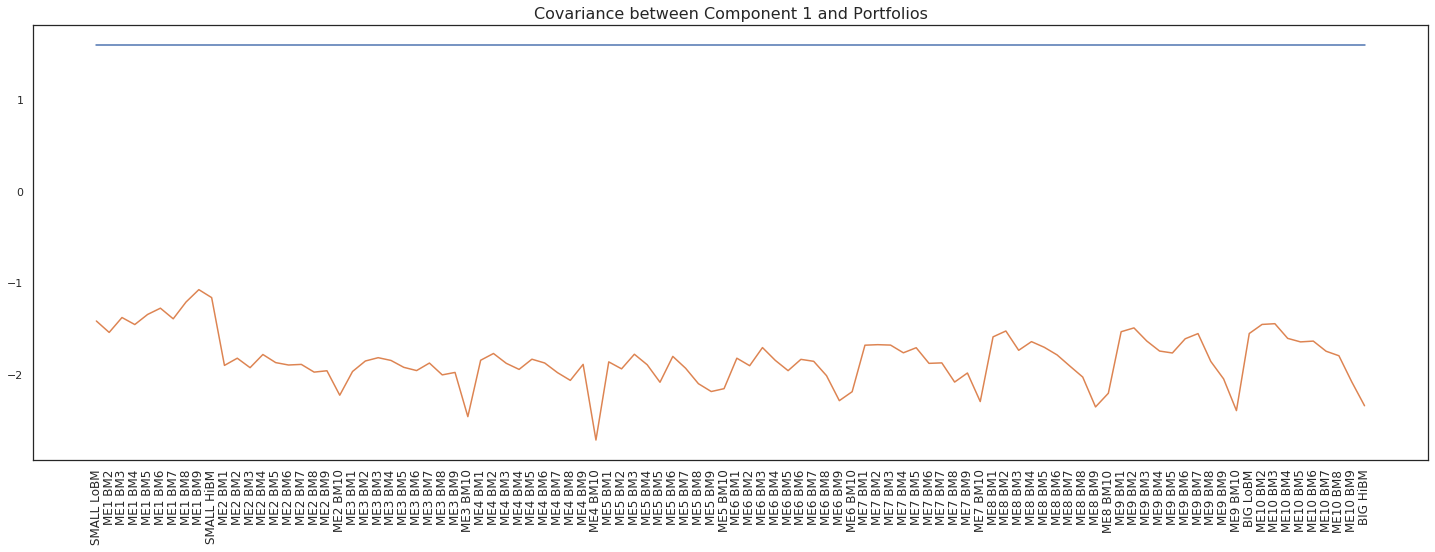

In [12]:
f = plt.figure(figsize=(25, 8))
plt.plot(C1)
plt.xticks(range(portfolios_df.shape[1]), portfolios_df.columns, fontsize=12, 
           rotation=90)
plt.title('Covariance between Component 1 and Portfolios', fontsize=16)

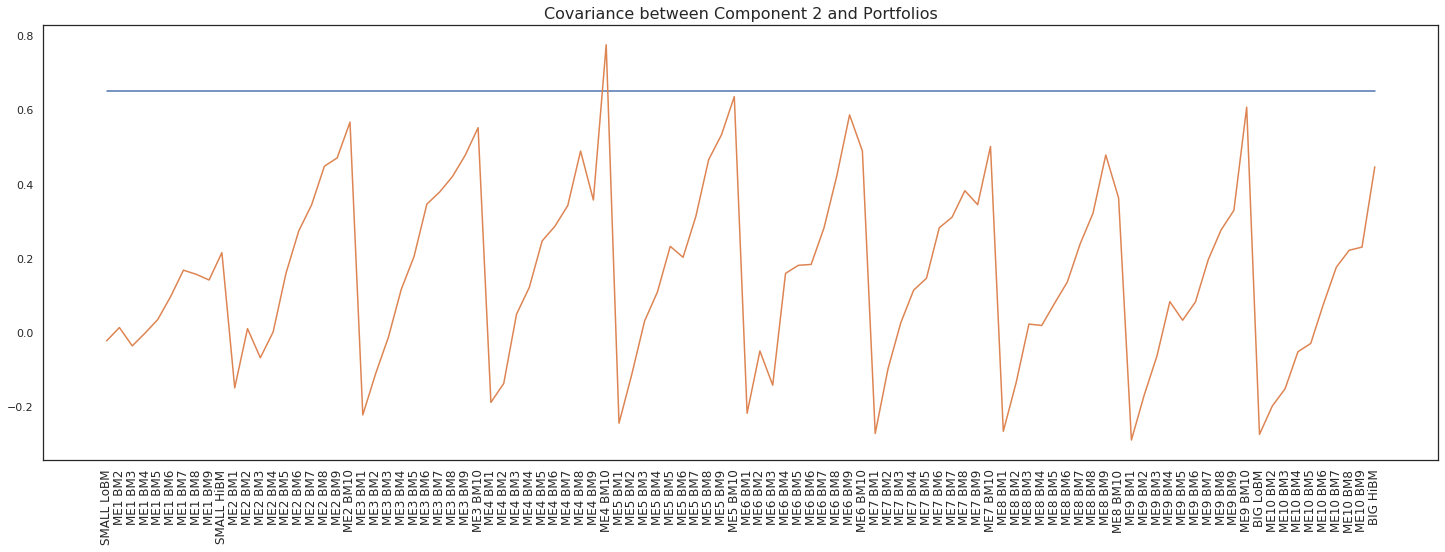

In [13]:
f = plt.figure(figsize=(25, 8))
plt.plot(C2)
plt.xticks(range(portfolios_df.shape[1]), portfolios_df.columns, fontsize=12, 
           rotation=90)
plt.title('Covariance between Component 2 and Portfolios', fontsize=16);

3. Using linear regression test for the significance of these factors, as per
the original work of Fama and French, under equation:

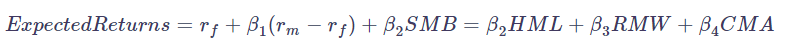

(Note: the equal sign should be plus)
Equation 1: only consider RF, Market-Rf and SMB
Equation 2: everything

Text(0.5, 1.0, 'F-value Equation 1')

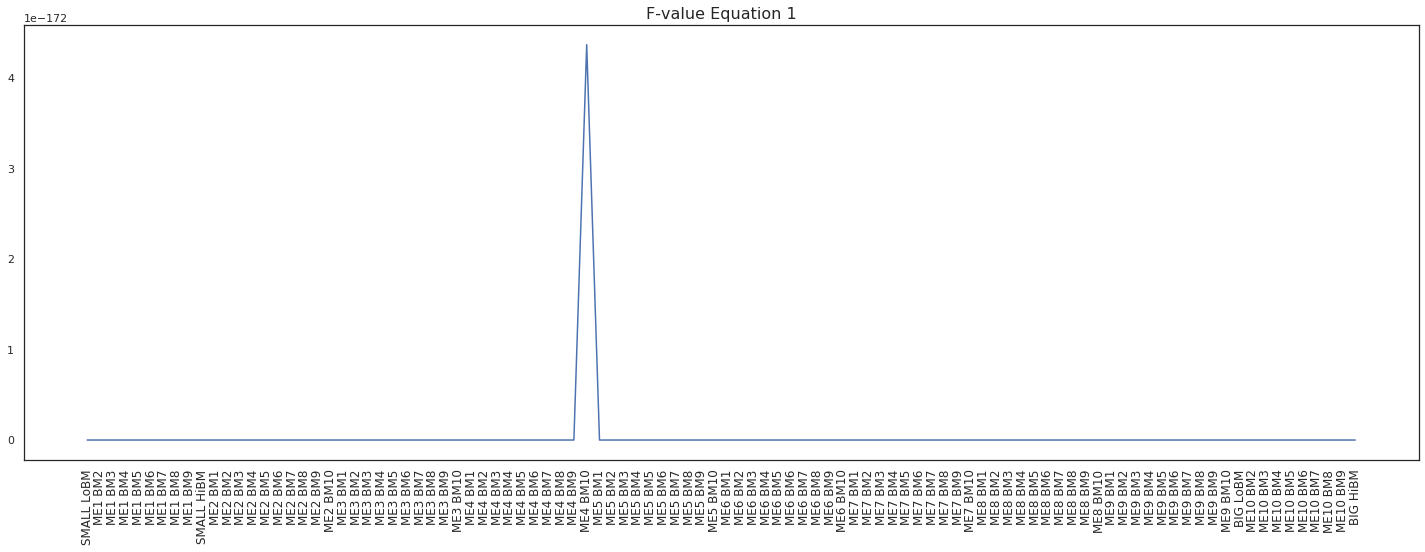

In [14]:
f_value_1=[]
for portfolio in portfolio_list:
    lm=sm.OLS(portfolios_df[portfolio],factors_df[['RF','Mkt-RF','SMB']])
    slr_results = lm.fit()
    f_value_1.append(slr_results.f_pvalue)
f = plt.figure(figsize=(25, 8))
plt.plot(f_value_1)
plt.xticks(range(portfolios_df.shape[1]), portfolios_df.columns, fontsize=12, 
           rotation=90)
plt.title('F-value Equation 1', fontsize=16)

Text(0.5, 1.0, 'F-value Equation 2')

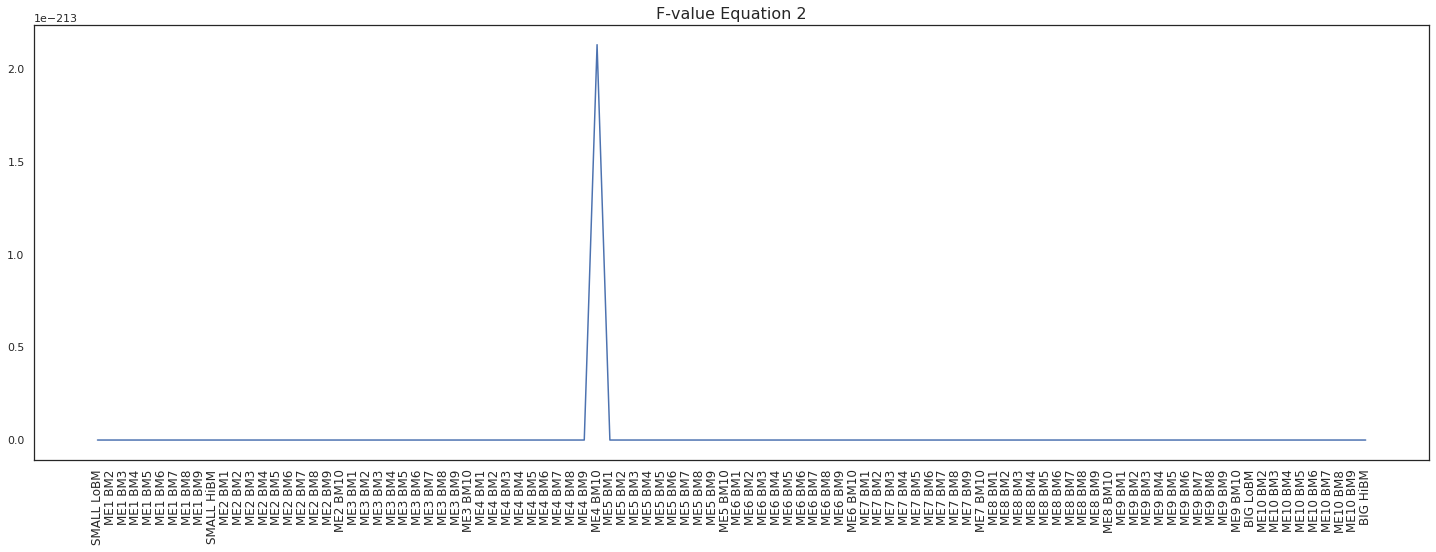

In [15]:
f_value_2=[]
for portfolio in portfolio_list:
    lm=sm.OLS(portfolios_df[portfolio],factors_df[['RF','Mkt-RF','SMB','HML','RMW','CMA']])
    slr_results = lm.fit()
    f_value_2.append(slr_results.f_pvalue)
f = plt.figure(figsize=(25, 8))
plt.plot(f_value_2)
plt.xticks(range(portfolios_df.shape[1]), portfolios_df.columns, fontsize=12, 
           rotation=90)
plt.title('F-value Equation 2', fontsize=16)

We can easily see that all factors are significant since f-value is small